In [9]:
import pandas as pd
file_path="C:/Users/victo/anaconda3/jupyter practice data/students.csv"
df1=pd.read_csv(file_path,engine="python")
df1

,name,korean,english,math
0,Kang,100,90,100
1,Kim,90,100,80
2,Park,90,95,90
3,Lee,100,85,95
4,Choi,85,100,100


In [15]:
import pandas as pd
file_path="C:/Users/victo/anaconda3/jupyter practice data/Cars93.xlsx"
df2=pd.read_excel(file_path) #encoding 항목 없음
df2

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


In [17]:
df2.to_csv("C:/Users/victo/anaconda3/jupyter practice data/Sample_data.csv")

In [21]:
import pickle
import pandas as pd

temp=pd.DataFrame({'a':[1],'b':[2]})
temp.to_pickle('sample_pickle.pkl') #확장자 아무렇게나 쓰면 됨. 근데 피클이 머지..

data=pd.read_pickle('sample_pickle.pkl') #확장자 이상한 것도 다 열 수 있음(?)
print(data)

type(data) #데이터프레임 타입임

   a  b
0  1  2


pandas.core.frame.DataFrame

# OPEN API 활용 예제

In [22]:
import pandas
from bs4 import BeautifulSoup
import requests
from openpyxl.workbook import Workbook
apikey='2iBxaKFKnzeyq04AkTe7ZCYjXgKOO6sXWOegK0YOWsgfPk%2FyFKrzqSaEiKFNMSUDX9qffhdPG0ajf0ydWGVzFQ%3D%3D'
#약국정보서비스 API
api = "http://apis.data.go.kr/B551182/pharmacyInfoService/getParmacyBasisList?serviceKey=2iBxaKFKnzeyq04AkTe7ZCYjXgKOO6sXWOegK0YOWsgfPk%2FyFKrzqSaEiKFNMSUDX9qffhdPG0ajf0ydWGVzFQ%3D%3D&pageNo=1&numOfRows=10&sidoCd=110000&sgguCd=110019&emdongNm=%EC%8B%A0%EB%82%B4%EB%8F%99&yadmNm=%EC%98%A8%EB%88%84%EB%A6%AC%EA%B1%B4%EA%B0%95&type=json&APPID={key}"
# 약국 정보 리스트 
list_drugs =["병원명","종별코드명","시도명","주소","전화번호"]
i=0 
for list_drug in list_drugs:
    url = api.format(list_drugs=list_drug, key=apikey)
    req= requests.get(url)
    re = req.text
    soup = BeautifulSoup(re, 'html.parser')
#병원명
    yadmnm = soup.find_all('yadmnm') #반복적으로 모두 가져올거면 find_all
#종별코드명
    sggucdnm = soup.find_all('sggucdnm')
#시도명
    sidocdnm= soup.find_all('sidocdnm')
#주소
    addr = soup.find_all('addr')
#전화번호
    telno = soup.find_all('telno')
    print ("병원명:", yadmnm)
    print ("종별코드명:", sggucdnm)
    print ("시도명:", sidocdnm)
    print ("주소:", addr)
    print ("전화번호:", telno)
    
#결과가 이상한데?? 같은 것 계속 반복됨..ㅋㅋㅋㅋㅅㅄㅂ


병원명: [<yadmnm>온누리건강약국</yadmnm>]
종별코드명: [<sggucdnm>중랑구</sggucdnm>]
시도명: [<sidocdnm>서울</sidocdnm>]
주소: [<addr>서울특별시 중랑구 봉화산로 215 1층 (신내동)</addr>]
전화번호: [<telno>02-3422-3097</telno>]
병원명: [<yadmnm>온누리건강약국</yadmnm>]
종별코드명: [<sggucdnm>중랑구</sggucdnm>]
시도명: [<sidocdnm>서울</sidocdnm>]
주소: [<addr>서울특별시 중랑구 봉화산로 215 1층 (신내동)</addr>]
전화번호: [<telno>02-3422-3097</telno>]
병원명: [<yadmnm>온누리건강약국</yadmnm>]
종별코드명: [<sggucdnm>중랑구</sggucdnm>]
시도명: [<sidocdnm>서울</sidocdnm>]
주소: [<addr>서울특별시 중랑구 봉화산로 215 1층 (신내동)</addr>]
전화번호: [<telno>02-3422-3097</telno>]
병원명: [<yadmnm>온누리건강약국</yadmnm>]
종별코드명: [<sggucdnm>중랑구</sggucdnm>]
시도명: [<sidocdnm>서울</sidocdnm>]
주소: [<addr>서울특별시 중랑구 봉화산로 215 1층 (신내동)</addr>]
전화번호: [<telno>02-3422-3097</telno>]
병원명: [<yadmnm>온누리건강약국</yadmnm>]
종별코드명: [<sggucdnm>중랑구</sggucdnm>]
시도명: [<sidocdnm>서울</sidocdnm>]
주소: [<addr>서울특별시 중랑구 봉화산로 215 1층 (신내동)</addr>]
전화번호: [<telno>02-3422-3097</telno>]


('<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta '
 'name="referrer" content="always">  <meta name="format-detection" '
 'content="telephone=no,address=no,email=no"> <meta name="viewport" '
 'content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta '
 'property="og:title" content="날씨 : 네이버 통합검색"/> <meta property="og:image" '
 'content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta '
 'property="og:description" content="\'날씨\'의 네이버 통합검색 결과입니다."> <meta '
 'name="description" lang="ko" content="\'날씨\'의 네이버 통합검색 결과입니다."> <title>날씨 : '
 '네이버 통합검색</title> <link rel="shortcut icon" '
 'href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  '
 '<link rel="search" type="application/opensearchdescription+xml" '
 'href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" '
 'title="Naver" /><link rel="stylesheet" type="text/css" '
 'href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_220324.

 'class="data"> <span class="icon_area"><i class="ico_rainfall" '
 'style="height:0%;"></i></span> <em class="value">0%</em> </li> <li '
 'class="data"> <span class="icon_area"><i class="ico_rainfall" '
 'style="height:20%;"></i></span> <em class="value">20%</em> </li> <li '
 'class="data"> <span class="icon_area"><i class="ico_rainfall" '
 'style="height:20%;"></i></span> <em class="value">20%</em> </li> <li '
 'class="data"> <span class="icon_area"><i class="ico_rainfall" '
 'style="height:30%;"></i></span> <em class="value">30%</em> </li> <li '
 'class="data"> <span class="icon_area"><i class="ico_rainfall" '
 'style="height:30%;"></i></span> <em class="value">30%</em> </li> <li '
 'class="data"> <span class="icon_area"><i class="ico_rainfall" '
 'style="height:30%;"></i></span> <em class="value">30%</em> </li> <li '
 'class="data"> <span class="icon_area"><i class="ico_rainfall" '
 'style="height:60%;"></i></span> <em class="value">60%</em> </li> <li '
 'class="data"> <span class="

 '<span class="icon_area"> <i class="ico_wind" style="transform: '
 'rotate(0deg)"></i> </span> <em class="value">동풍</em> </li> <li class="data"> '
 '<span class="icon_area"> <i class="ico_wind" style="transform: '
 'rotate(0deg)"></i> </span> <em class="value">동풍</em> </li> <li class="data"> '
 '<span class="icon_area"> <i class="ico_wind" style="transform: '
 'rotate(0deg)"></i> </span> <em class="value">동풍</em> </li> <li class="data"> '
 '<span class="icon_area"> <i class="ico_wind" style="transform: '
 'rotate(0deg)"></i> </span> <em class="value">동풍</em> </li> <li class="data"> '
 '<span class="icon_area"> <i class="ico_wind" style="transform: '
 'rotate(45deg)"></i> </span> <em class="value">남동풍</em> </li> <li '
 'class="data"> <span class="icon_area"> <i class="ico_wind" style="transform: '
 'rotate(45deg)"></i> </span> <em class="value">남동풍</em> </li> <li '
 'class="data"> <span class="icon_area"> <i class="ico_wind" style="transform: '
 'rotate(45deg)"></i> </span> <em class="

 'rotate(225deg)"></i> </span> <em class="value">북서풍</em> </li> </ul> </div> '
 '<div class="graph_wrap"> <h3 class="blind">풍속</h3> <ul> <li class="data"> '
 '<div class="data_inner"> <span class="base_bar" style="height:10%"> <span '
 'class="num">1</span> </span> </div> </li> <li class="data"> <div '
 'class="data_inner"> <span class="base_bar" style="height:10%"> <span '
 'class="num">1</span> </span> </div> </li> <li class="data"> <div '
 'class="data_inner"> <span class="base_bar" style="height:10%"> <span '
 'class="num">1</span> </span> </div> </li> <li class="data"> <div '
 'class="data_inner"> <span class="base_bar" style="height:10%"> <span '
 'class="num">1</span> </span> </div> </li> <li class="data"> <div '
 'class="data_inner"> <span class="base_bar" style="height:17%"> <span '
 'class="num">2</span> </span> </div> </li> <li class="data"> <div '
 'class="data_inner"> <span class="base_bar" style="height:14%"> <span '
 'class="num">1</span> </span> </div> </li> <li class="

 'target="_blank" href="https://keep.naver.com/" class="spnew_af item '
 'item_quick" '
 'onclick="goOtherCR(this,\'a=web_gen.kephome&r=4&i=a00000fa_67e05c3b669007f0f9db8768&u=\'+urlencode(this.href));">Keep '
 '바로가기</a> </div> </div> <div class="total_tit_group"> <div '
 'class="total_source"> <div class="source_box"> <a target="_blank" '
 'href="http://www.weather.go.kr/weather/warning/wtouchOn.jsp" class="thumb" '
 'onclick="goOtherCR(this,\'a=web_gen*w.link&r=4&i=a00000fa_67e05c3b669007f0f9db8768&u=\'+urlencode(this.href));"><img '
 'src="https://search.pstatic.net/sunny/?src=https%3A%2F%2Fwww.kma.go.kr%2Fiphone-shortcut.png&type=f30_30_png_expire24" '
 'width="15" height="15" alt=""></a> <a target="_blank" '
 'href="http://www.weather.go.kr/weather/warning/wtouchOn.jsp" class="txt '
 'elss" '
 'onclick="goOtherCR(this,\'a=web_gen*w.link&r=4&i=a00000fa_67e05c3b669007f0f9db8768&u=\'+urlencode(this.href));">www.weather.go.kr<i '
 'class="divide">›</i>weather</a> </div> </div> <div cl
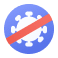
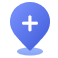
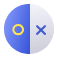
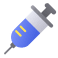
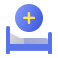

In [23]:
from bs4 import BeautifulSoup as bs
from pprint import pprint #예쁘게 정렬해서 보여줌
import requests as rq

html=rq.get('https://search.naver.com/search.naver?query=날씨')
pprint(html.text)

In [24]:
from bs4 import BeautifulSoup as bs #from bs4 는 머지?
from pprint import pprint #예쁘게 정렬해서 보여줌
import requests as rq #이게 있어야 데이터를 가지고 옴(?)

html=rq.get('https://search.naver.com/search.naver?query=날씨')
soup=bs(html.text,'html.parser') #웹에서 파싱
dustdata_one=soup.find('div',{'class':'bx_inner'}) #class 명이 bx_inner 인 것 찾기
print(dustdata_one)


<div class="bx_inner"> <strong class="tit">정렬</strong> <div class="option" role="tablist"> <a aria-selected="true" class="txt" href="?where=nexearch&amp;sm=tab_opt&amp;query=%EB%82%A0%EC%94%A8&amp;nso=so%3Ar&amp;nso_open=1" onclick="return goOtherCR(this, 'a=opt.sim&amp;r=&amp;i=&amp;u='+urlencode(this.href));" role="tab">관련도순</a><a aria-selected="false" class="txt" href="?where=nexearch&amp;sm=tab_opt&amp;query=%EB%82%A0%EC%94%A8&amp;nso=so%3Add&amp;nso_open=1" onclick="return goOtherCR(this, 'a=opt.new&amp;r=&amp;i=&amp;u='+urlencode(this.href));" role="tab">최신순</a> </div> </div>
